In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gf
from bch import BCH
%matplotlib inline

In [2]:
gf.get_primpoly(BCH(15,1).pm)

array([1, 0, 0, 1, 1])

In [3]:
codes_table = []
t1_total = datetime.now()
for n in [7, 15, 31, 63, 127, 255, 511, 1023, 2047]:
    last = None
    for t in range(1, (n - 1) // 2 + 1):
        print('.', end='')
        bch = BCH(n, t, ref=last)
        if last is not None and bch.k != last.k or t >= (n - 1) // 2:
            if t >= (n - 1) // 2:
                last = bch
            speed = last.k / last.n
            print()
            print(last.n, last.k, f"t={last.t}, speed={speed:.2}")
            g_hex = hex(int(''.join(map(str, last.g)), base=2))[2:].upper()
            codes_table.append([last.n, last.k, last.t, speed, g_hex])
#             if last.k <= 18:
#                 t1 = datetime.now()
#                 d = last.dist()
#                 t2 = datetime.now()
#                 tim = (t2 - t1).total_seconds()
#                 print(f"real t = {(d - 1) // 2}\t(d={d}, k={last.k}, computed in {tim} s)")
        last = bch
t2_total = datetime.now()
tim_total = (t2_total - t1_total).total_seconds()
print()
print('total time:', tim_total)

..
7 4 t=1, speed=0.57
.
7 1 t=3, speed=0.14
..
15 11 t=1, speed=0.73
.
15 7 t=2, speed=0.47
.
15 5 t=3, speed=0.33
...
15 1 t=7, speed=0.067
..
31 26 t=1, speed=0.84
.
31 21 t=2, speed=0.68
.
31 16 t=3, speed=0.52
..
31 11 t=5, speed=0.35
..
31 6 t=7, speed=0.19
.......
31 1 t=15, speed=0.032
..
63 57 t=1, speed=0.9
.
63 51 t=2, speed=0.81
.
63 45 t=3, speed=0.71
.
63 39 t=4, speed=0.62
.
63 36 t=5, speed=0.57
.
63 30 t=6, speed=0.48
.
63 24 t=7, speed=0.38
...
63 18 t=10, speed=0.29
.
63 16 t=11, speed=0.25
..
63 10 t=13, speed=0.16
..
63 7 t=15, speed=0.11
...............
63 1 t=31, speed=0.016
..
127 120 t=1, speed=0.94
.
127 113 t=2, speed=0.89
.
127 106 t=3, speed=0.83
.
127 99 t=4, speed=0.78
.
127 92 t=5, speed=0.72
.
127 85 t=6, speed=0.67
.
127 78 t=7, speed=0.61
..
127 71 t=9, speed=0.56
.
127 64 t=10, speed=0.5
.
127 57 t=11, speed=0.45
..
127 50 t=13, speed=0.39
.
127 43 t=14, speed=0.34
.
127 36 t=15, speed=0.28
......
127 29 t=21, speed=0.23
..
127 22 t=23, speed=0.17
..

KeyboardInterrupt: 

In [3]:
df = pd.DataFrame(data=codes_table, columns=["n", "k", "t", "speed", "g"])
# df.g = df.g.apply(lambda x: hex(x)[2:].upper())
# df["speed"] = df.k / df.n
df.head(10)

,n,k,t,speed,g
0,7,4,1,0.571429,B
1,7,1,3,0.142857,7F
2,15,11,1,0.733333,13
3,15,7,2,0.466667,1D1
4,15,5,3,0.333333,537
5,15,1,7,0.066667,7FFF
6,31,26,1,0.838710,25
7,31,21,2,0.677419,769
8,31,16,3,0.516129,8FAF
9,31,11,5,0.354839,1626D5


In [20]:
df.to_csv("bch_table.csv", sep=',')
df = pd.read_csv("bch_table.csv", sep=',', index_col=0)

In [21]:
df

,n,k,t,speed,g
0,7,4,1,0.571429,B
1,7,1,3,0.142857,7F
2,15,11,1,0.733333,13
3,15,7,2,0.466667,1D1
4,15,5,3,0.333333,537
5,15,1,7,0.066667,7FFF
6,31,26,1,0.838710,25
7,31,21,2,0.677419,769
8,31,16,3,0.516129,8FAF
9,31,11,5,0.354839,1626D5


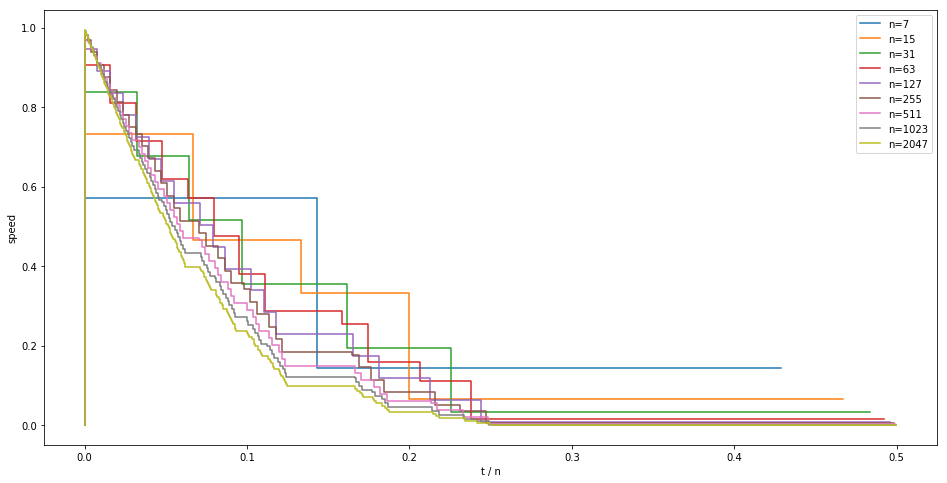

In [28]:
n_list = [7, 15, 31, 63, 127, 255, 511, 1023, 2047]
plt.figure(figsize=(16,8))
# ax = fig.add_subplot(111)
for n in n_list:
    df_choice = df[df.n==n]
    x = df_choice.t.values / n
    x = np.concatenate(([0], x))
    y = df_choice.speed.values
    y = np.concatenate(([0], y))
    plt.step(x, y, where='pre', label=f"n={n}")
#     plt.plot(df_choice["t"], df_choice["speed"], label=f"{n} line")
plt.xlabel('t / n')
plt.ylabel('speed')
plt.legend()

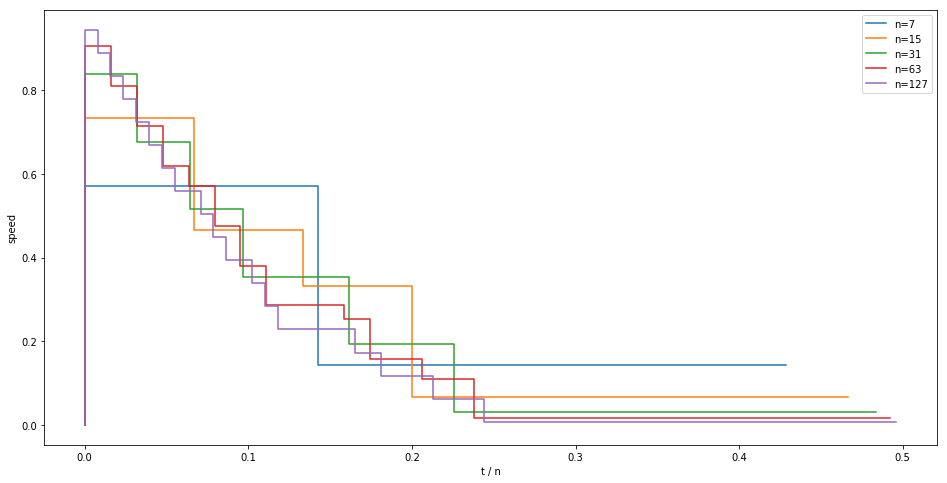

In [29]:
n_list2 = [7, 15, 31, 63, 127]
plt.figure(figsize=(16,8))
# ax = fig.add_subplot(111)
for n in n_list2:
    df_choice = df[df.n==n]
    x = df_choice.t.values / n
    x = np.concatenate(([0], x))
    y = df_choice.speed.values
    y = np.concatenate(([0], y))
    plt.step(x, y, where='pre', label=f"n={n}")
#     plt.plot(df_choice["t"], df_choice["speed"], label=f"{n} line")
plt.xlabel('t / n')
plt.ylabel('speed')
plt.legend()

In [9]:
n = 15
t = 3
bch = BCH(n, t)
k = bch.k

In [12]:
U = np.random.choice(2, k)
U

array([1, 1, 0, 0, 1])

In [15]:
V = bch.encode(U)
V

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [16]:
W = np.copy(V)
W[[2,4]] ^= 1

In [18]:
bch.decode(W, method='pgz')

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])